### Practice 2

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, preprocessing
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np

data = datasets.load_boston()
dfX = pd.DataFrame(data.data, columns=data.feature_names)
dfX = dfX.drop(['CHAS', 'RAD'], axis=1) #범주형 제거
dfY = pd.DataFrame(data.target, columns=['MEDV'])
regr = LinearRegression()

# ToDo: data processing
n=1000
avg=0
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, train_size=0.7)
    regr.fit(X_train, y_train)
    avg += regr.score(X_test, y_test)
print("before data processing: %f" %(avg/n))

before data processing: 0.697631


#### 데이터 전처리 적용 후

In [41]:
# data preprocessing
# dfX.LSTAT = np.log(dfX.LSTAT)
# dfX.DIS =  np.log(dfX.DIS)
dfX['LSTAT_log'] = preprocessing.scale(np.log(dfX['LSTAT']+1))
dfX['LSTAT_sqrt'] = preprocessing.scale(np.sqrt(dfX['LSTAT']+1))
dfX['LSTAT_sqrt'] = preprocessing.scale(np.sqrt(dfX['LSTAT']+1))

n=1000
avg=0
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, train_size=0.7)
    regr.fit(X_train, y_train)
    avg += regr.score(X_test, y_test)
print("after data processing: %f" %(avg/n))

after data processing: 0.765303


In [35]:
dfX.shape

(506, 13)

In [36]:
dfX.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'LSTAT_log', 'LSTAT_sqrt'],
      dtype='object')

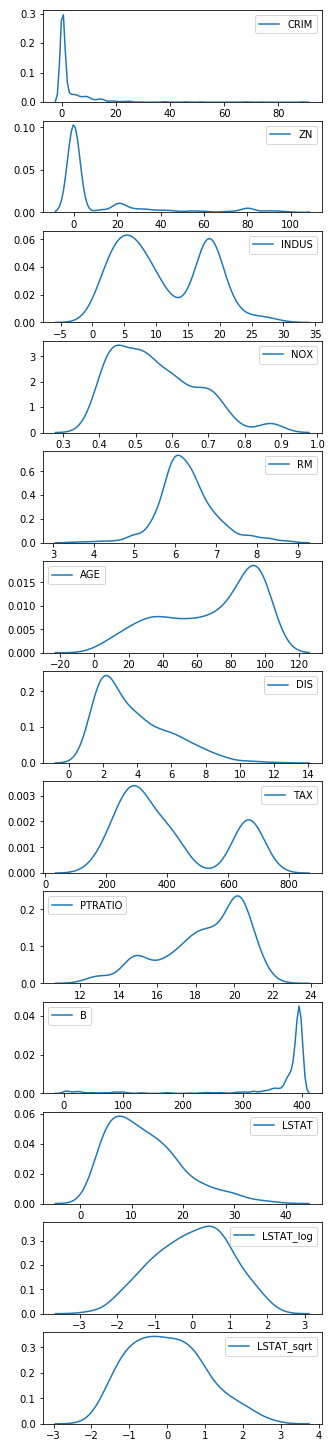

In [37]:
_, axes = plt.subplots(len(dfX.columns), 1, figsize = (5, 26))
for i, ax in enumerate(axes):
    sns.kdeplot(dfX.iloc[:, i], ax=ax)

### 3

In [32]:
df = pd.read_csv('./Data_Prep.csv', index_col=0)

In [33]:
df.head()

,iduser,mdutype,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,...,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
0,10100018739106,NaN,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,6.0,12.0,0.0,0.0,3504812.0,0.0,0.0,3504812.0
1,10100037810674,NaN,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,...,0.0,0.0,8.0,23.0,0.0,0.0,17123098.0,0.0,0.0,17123098.0
2,10100036273719,NaN,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,4.0,4.0,0.0,0.0,2234363.0,0.0,0.0,2234363.0
3,10100027752244,NaN,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,5.0,6.0,2.0,0.0,602361.0,210114.0,0.0,812475.0
4,10100000624840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_ = df.drop(['iduser', 'mdutype', 'group'], axis = 1)

In [37]:
scaler = [preprocessing.StandardScaler() for i in df_.columns]

In [ ]:
def std_based_outlier(df): # 강의자료에 있음, p24
    s = set()
    for colname in df.columns:
        outlier = np.abs(df[colname][df[colname].notnull()]-df[collname][])
        s.update(outlier[outlier==True].index.tolist())
    df = df.iloc[list(set(range(len(df))).difference(s))]
    return df
        
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*1.5)
    upper_bound = quartile_3 + (iqr*1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [ ]:
_, axes = plot.subplots(19, 1, figsize=(5,50))
for i, ax in enumerate(axes):
    

In [ ]:
df = std_base_outlier(df_)
df